In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.optimize import minimize
import pyPI as pi

In [2]:
# Campo a la salida del primer beam splitter
E_in = pi.polarization_basis_set('P45')

In [3]:
# En ambas mediciones el campo incidente en la muestra se mantiene con circular derecha
alpha_HWP_S, alpha_QWP_S = pi.PSG_calculator(E_in, pi.polarization_basis_set('R'), p = True)
print('Campo electrico incidente en la muestra')
E_is = pi.field_notation(pi.PSG(alpha_HWP_S, alpha_QWP_S) @ E_in, p = True)

HWP: alpha_1 = 0.2500π
QWP: alpha_2 = 0.0000π
Campo electrico incidente en la muestra
0.70711
0.70711
0.5π



In [4]:
# Miremos que pasa si la muestra tiene una birrefringencia de pi/2 sin rotacion
E_s = pi.field_notation(pi.jones_matrix(np.pi/4,np.pi/3)@E_is,p=True)

0.44025
0.89788
0.64758π



In [5]:
# El primer interferograma se toma con el campo en el brazo de referencia con una polarizacion horizontal
alpha_HWP_R1, alpha_QWP_R1 = pi.PSG_calculator(E_in, pi.polarization_basis_set('H'), p = True)
print('Campo electrico en el brazo de referencia')
E_r1 = pi.field_notation(pi.PSG(alpha_HWP_R1, alpha_QWP_R1) @ E_in, p = True)

HWP: alpha_1 = 0.1250π
QWP: alpha_2 = 0.0000π
Campo electrico en el brazo de referencia
1.0
0.0
0.0π



In [6]:
# Aca se establece el numero de franjas, digamos queremos unas 20
n = 20

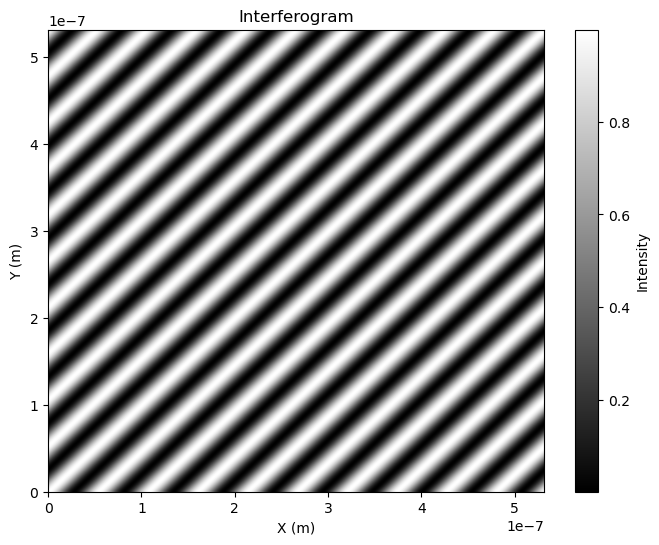

In [7]:
# Hagamos la primera medida
info_1 = pi.numeric_intensity(E_r1, E_s, n=20, plot = True)

In [9]:
# El segundo interferograma se toma con el campo en el brazo de referencia con una polarizacion a 45
alpha_HWP_R2, alpha_QWP_R2 = pi.PSG_calculator(E_in, pi.polarization_basis_set('P45'), p = True)
print('Campo electrico en el brazo de referencia')
E_r2 = pi.field_notation(pi.PSG(alpha_HWP_R2, alpha_QWP_R2) @ E_in, p = True)

HWP: alpha_1 = 0.2500π
QWP: alpha_2 = 0.2500π
Campo electrico en el brazo de referencia
0.70711
0.70711
0.0π



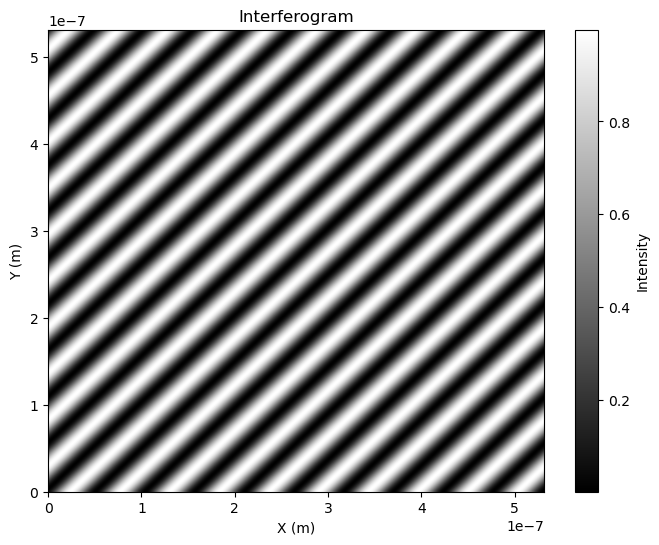

In [10]:
# Hagamos la segunda medida
info_2 = pi.numeric_intensity(E_r2, E_s, n=20, plot = True)

In [11]:
# Variables proporcionadas
b_1 = info_1[0]
m_1 = info_1[1]

Esx = np.abs(m_1 / np.abs(E_r1[0, 0]))
Esy = np.abs(np.sqrt(b_1 - Esx**2 - E_r1[0, 0]**2))

Erx = np.abs(E_r2[0, 0])
Ery = np.abs(E_r2[1, 0])
vartheta_2 = info_2[2]


In [12]:
# Definir las variables simbólicas
delta_phi_s = sp.Symbol('delta_phi_s', real=True)

# Expresión para tan(vartheta_2)
tan_vartheta_2_expr = (-Ery * Esy * sp.sin(-delta_phi_s)) / (Erx * Esx + Ery * Esy * sp.cos(-delta_phi_s))

# Ecuación a resolver
equation = sp.tan(vartheta_2) - tan_vartheta_2_expr

# Resolver la ecuación
solution = sp.solve(equation, delta_phi_s)[0]

# Convertir la solución simbólica a una expresión numérica
solution_numeric = float(solution.evalf())

# Calcular Es_calculated
Es_calculated = pi.field_notation(np.array([[Esx], [Esy * np.exp(1j * solution_numeric)]]), p=True)


0.44025
0.89788
0.67825π



In [13]:
np.abs(E_s) 

array([[0.44025],
       [0.89788]])

In [14]:
np.abs(Es_calculated)

array([[0.44025],
       [0.89788]])